<a href="https://colab.research.google.com/github/SatyaSampreeth/Bank-PersonalLoanCampaign/blob/master/pf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

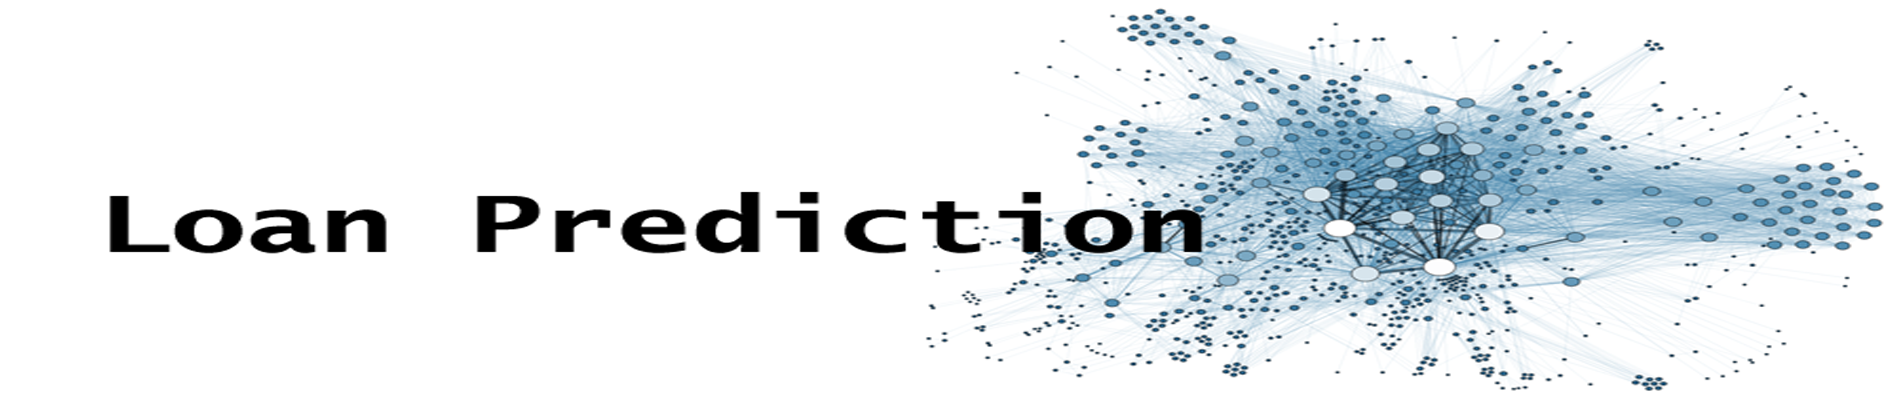


## **Project** :

**Objective**:
The retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The dataset contains data on 5000 customers.

# Importing required libraries and Dataset

In [1]:
# Necessary libraries are imported
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [3]:
# Dataset is read 
data = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')

In [4]:
#making a copy of dataset for future use
d=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')
d

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
#Displays first 5 row values from Dataset
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Displays last 5 row values from Dataset
data.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
# Coloumns in Dataset
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**Variables** **definition**

*   ID - Customer ID
*   Age - Customer's age in completed years

*  Experience - Number of years of professional experience.

*   Income - Annual income of the customer (in $ 1000).
*   ZIPCode - Home Address ZIP code


*   Family - Family size of the customer



*   CCAvg - Avg. spending on credit cards per month - in thousands usd

*   Education - Education Level of the customer.
  1.   Undergrad
  2.   Graduate
  3.   Advanced/Professional




*   Mortgage - Value of house mortgage if any - in thousands used
*   Personal Loan - Did this customer accept the personal loan offered in the last campaign?(*This is our target variable*)


*   Securities Account - Does the customer have a securities account with the bank?


*   CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

*   Online - Does the customer use internet banking facilities?
*   CreditCard - Does the customer uses a credit card issued by Bank?









# Data Exploration and Statistical Summary

In [8]:
#Shape of Dataset
data.shape

(5000, 14)

**Information on the features or** **attributes**



*   The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
1.   **Categorical Feature:**
      *   Family
      *   Education
      *   Zip Code
      *   Securities Account
      *   CD Account
      *   Online
      *   Credit Card

2.  **Numerical feature:**
      *   Age
      *   Experience
      *   Income
      *   CCAvg
      *   Mortage



In [9]:
#Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation**



*  No Missing Values



In [10]:
#Data types of each Attribute
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
#Checking for null values
data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Observation**


*   No Null Values



In [12]:
# Eye balling the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation**


*   Column 'Experience' has negative values




In [13]:
#Checking for negative values
any(data['Experience'] < 0)


True

In [14]:
#To know number of rows having negative values
data[data['Experience'] < 0]['Experience'].count()

52

In [15]:
#Finding corelation of columns with Experinece coloumn
experience = data['Experience']
for i in data.columns:
  values=data[i]
  if i !='Experience':
    print(i)
    print(experience.corr(values))


ID
-0.008325759886678257
Age
0.9942148569683321
Income
-0.04657417765298185
ZIP Code
-0.0286255479874317
Family
-0.052563147136445616
CCAvg
-0.05008908483804665
Education
0.013151812889481949
Mortgage
-0.010581552418193373
Personal Loan
-0.007413098076770248
Securities Account
-0.0012321344074537172
CD Account
0.010353331150860672
Online
0.013897899571362208
CreditCard
0.008967447335361377


**Obsevation**


*   Age and Experience seems to be quiet Symmetrical and Correalated


*   So we can replace the negative values with median values of that particular age of Customer



**Replacing the negative values with the median value**

Defining variable:


*   pos_Exp - rows having positive Experience
*   neg_Exp - rows having negative Experience
*   mylist - List containing id's of rows with negative Experience
*   pos_Expfil - rows having positive Experience of particular Age

*   exp - Median Experience value of all
rows with particular Age








In [16]:
# getting the customer ID who has negative experience
pos_Exp = data.loc[data['Experience'] >0]
neg_Exp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[neg_Exp]['ID'].tolist()
mylist

[90,
 227,
 316,
 452,
 525,
 537,
 541,
 577,
 584,
 598,
 650,
 671,
 687,
 794,
 890,
 910,
 1174,
 1429,
 1523,
 1906,
 2103,
 2431,
 2467,
 2546,
 2619,
 2718,
 2849,
 2877,
 2963,
 2981,
 3077,
 3131,
 3158,
 3280,
 3285,
 3293,
 3395,
 3426,
 3627,
 3797,
 3825,
 3888,
 3947,
 4016,
 4089,
 4117,
 4286,
 4412,
 4482,
 4515,
 4583,
 4958]

In [17]:
#cleaning the negative values
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    pos_Expfil = pos_Exp[(pos_Exp.Age == age)]
    exp = pos_Exp['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [18]:
#Checking for negative values after replacing with median values
any(data['Experience'] < 0)

False

In [19]:
#Descriptive Statics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.338000,11.253190,0.0,11.00,21.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [20]:
#checking correlation of Experience with Age
experience = data['Experience']
age=data['Age']
experience.corr(age)

0.9754894503018893

In a machine learning model,it is necessary to seperate signal from from noise.Hence the ID column which defenitely doesn't have any signal is being dropped.Also the experience column seems to be highly correlated with the Age column,so can be dropped. 

In [21]:
#Dropping Irrevelevant columns
data=data.drop(['ID','Experience'],axis=1)
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# Exploratory Data Analysis

In [22]:
#Finding number of Unique values in each column
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [23]:
#Finding Number of people with Mortgage value zero(0)
print("People with Mortgage value zero are:",end=' ')
len(data.loc[data["Mortgage"]==0])

People with Mortgage value zero are: 

3462

**Observation**

*   There are 3462 people with '0' mortgage out of 5000 which is making it skewed 



In [24]:
#Finding Number of people with CCAvg value zero(0)
print("People with Credit Card spending value zero are:",end=' ')
len(data.loc[data["CCAvg"]==0.])

People with Credit Card spending value zero are: 

106

**Observation**

*   There are 106 people with '0' CCAvg 


In [25]:
#Value counts of all categorical columns
categorical_Col=['Family','Education','Securities Account','CD Account','Online','CreditCard']
for i in categorical_Col:
  print(data[i].value_counts(ascending=True))

3    1010
4    1222
2    1296
1    1472
Name: Family, dtype: int64
2    1403
3    1501
1    2096
Name: Education, dtype: int64
1     522
0    4478
Name: Securities Account, dtype: int64
1     302
0    4698
Name: CD Account, dtype: int64
0    2016
1    2984
Name: Online, dtype: int64
1    1470
0    3530
Name: CreditCard, dtype: int64


In [26]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

## Univariate Analysis

**UNIVARIATE ANALYSIS**

Text(0.5, 1.0, 'Credit Card Distribution')

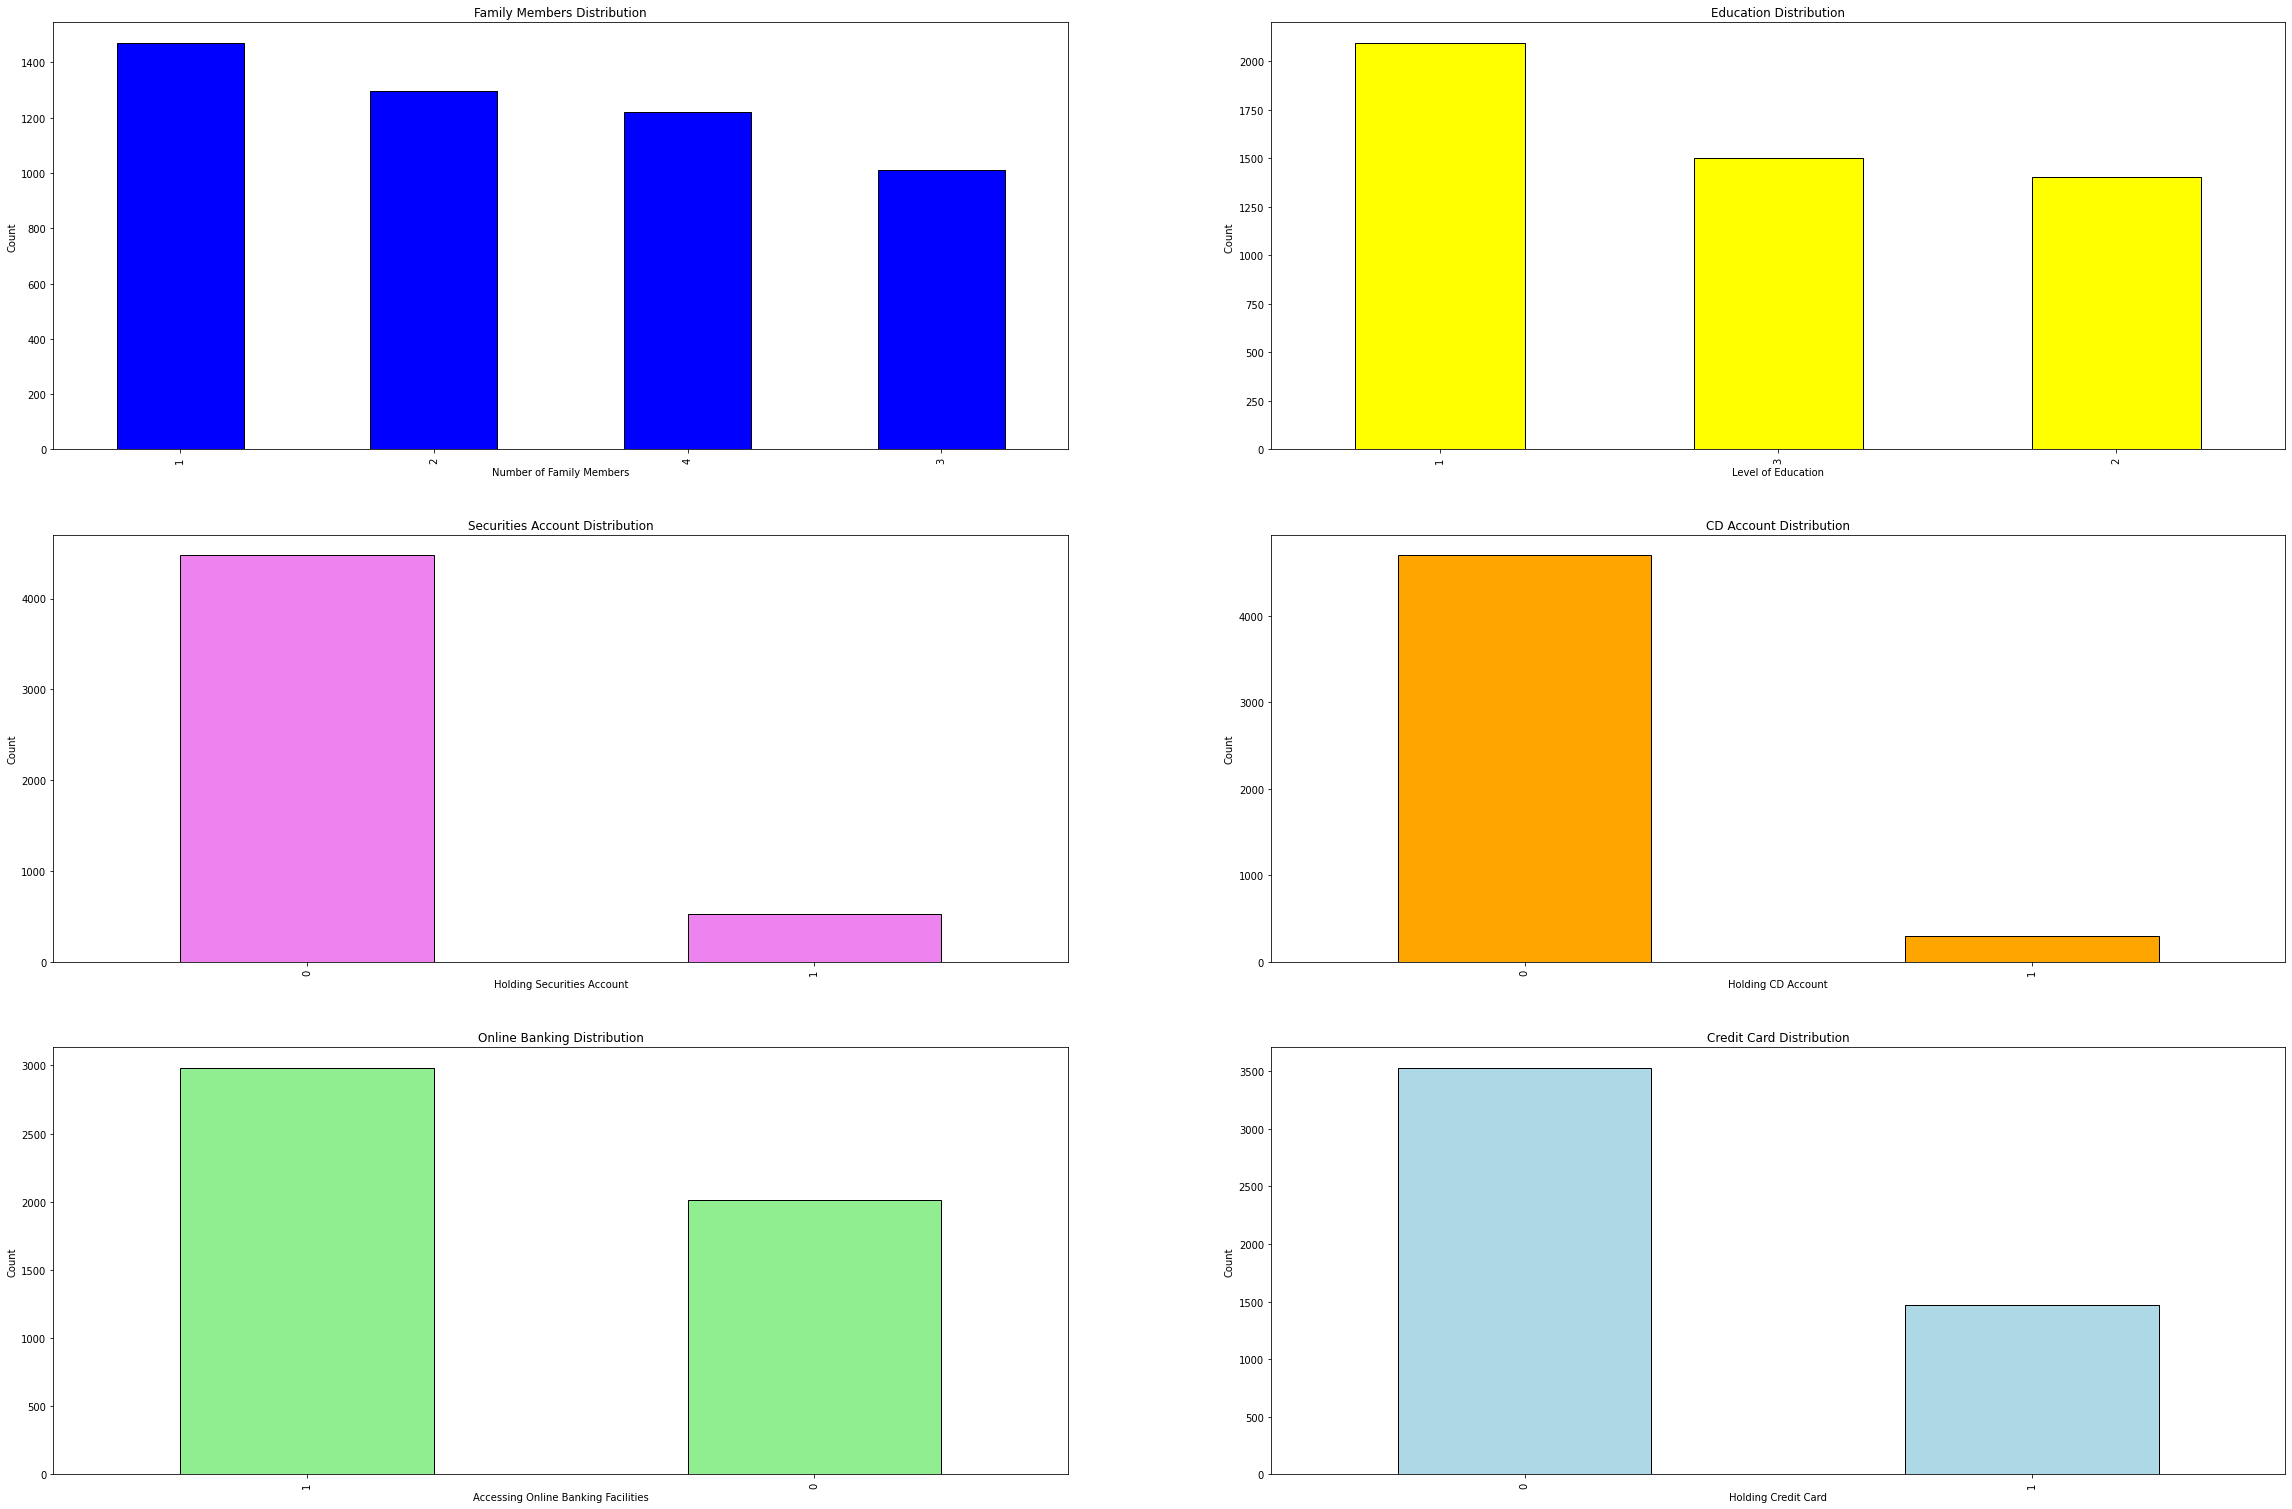

In [27]:
#barplot for analysing  
plt.figure(figsize=(40,55))

plt.subplot(6,2,1)
data['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
data['Education'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
data['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
data['CD Account'].value_counts().plot(kind="bar", align='center',color = 'orange',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
data['Online'].value_counts().plot(kind="bar", align='center',color = 'lightgreen',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
data['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

**Observation**


*  The variables family and education are ordinal variables. The distribution of families is evenly distributed
* It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible  List item



In [28]:
#Checking skewness of data numerically
import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.Age),stats.skew(d.Experience),stats.skew(data.Income),stats.skew(data.CCAvg)
                                      ,stats.skew(data.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

,Skewness
Age,-0.029332
Experience,-0.026317
Income,0.841086
CCAvg,1.597977
Mortgage,2.103371


**Observation**


*   *Age* and *Experience* seems to be quiet Symmetrical
*   *Income*, *CCAvg* and *Mortgage* are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values



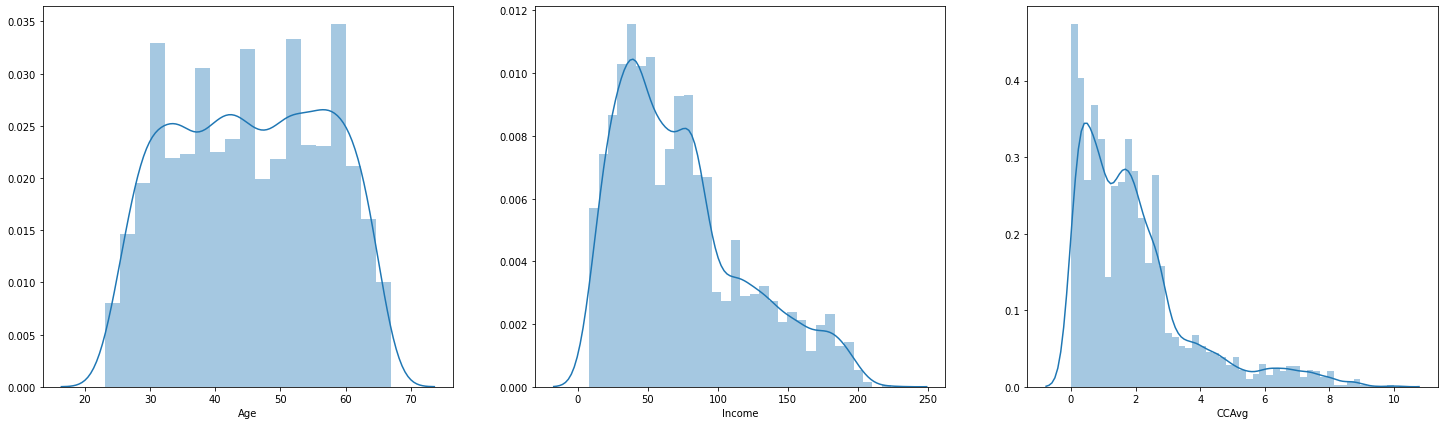

In [29]:
#graphical representation of data
fig, axs = plt.subplots(1,3 ,figsize=(25, 7))
sns.distplot( data.Age,ax=axs[0])
sns.distplot(data.Income, ax=axs[1])
sns.distplot( data.CCAvg, ax=axs[2])

**Observation**


*   *Age* feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median or through the above plotted graph
*   *Income* is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median


*   *CCAvg* is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K




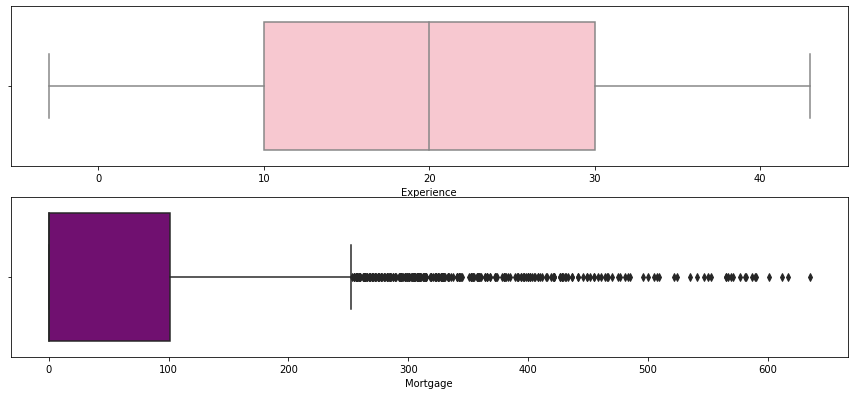

In [30]:
#boxplot for analysing data
plt.figure(figsize= (15,17))

plt.subplot(5,1,1)
sns.boxplot(x= d.Experience, color='pink')

plt.subplot(5,1,2)
sns.boxplot(x= data.Mortgage, color='purple')

**Observation**


*   *Experience* is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.
*   *Mortgage* 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.



## Multivariate Analysis

**MULTIVARIATE ANALYSIS**

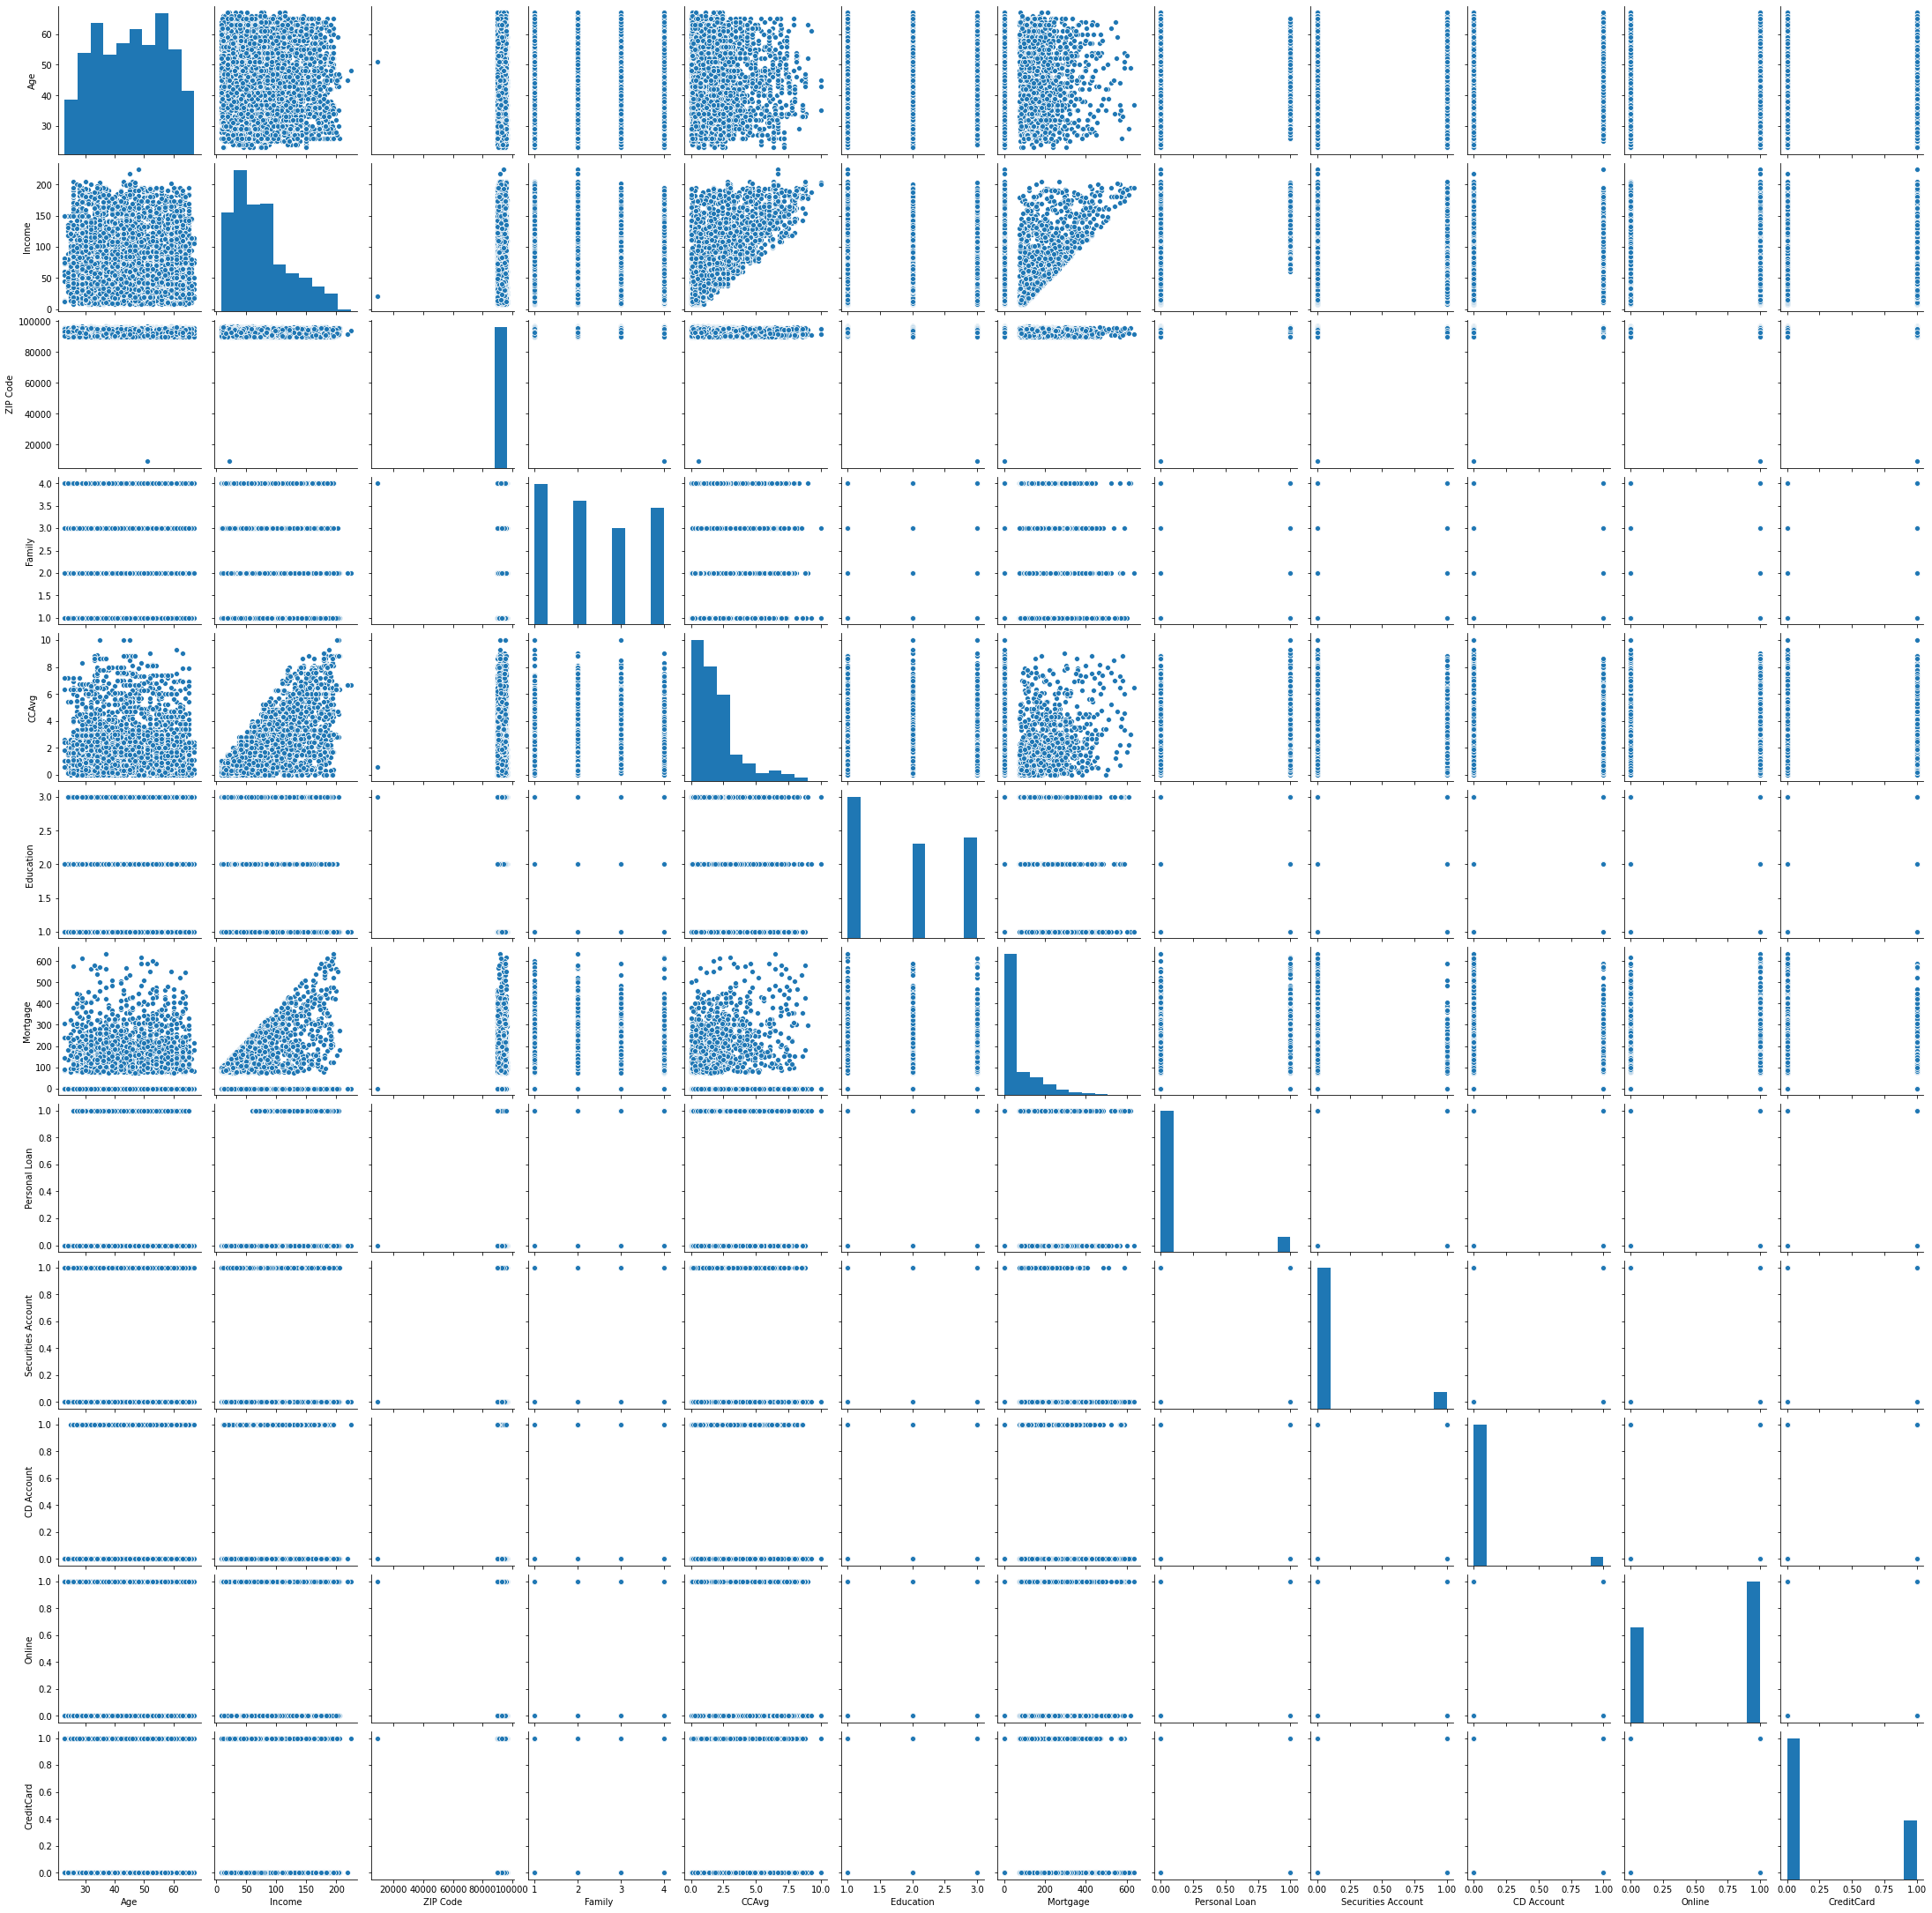

In [31]:
#Pairplot
sns.pairplot(data)

**Observation**


*   Age : Three small peaks can be indicating three values of age would be slightly more in number.However, the mean and median of the attribute is equal.The distribution is in considerable shape.

* Eductaion : Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance
*   Family : It has 4 peaks(4 values) , families with least member is highest in the sample.

*   Securities Account : This attributes tells us that majorly cutomers are not having Security account.

* CD account : Most of the customers dont have CDaccounts.



*   Online : Higher number of customers use online banking in the sample
*   Credit Card : This attribute has less customers using CC in comparison to the CC users.





In [32]:
#No of values for each instance 
data["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


**Dependent variable analysis**

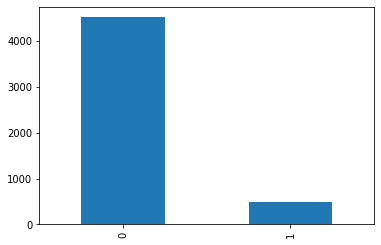

In [33]:
#barplot for Personal Loan 
pd.value_counts(data["Personal Loan"]).plot(kind="bar")

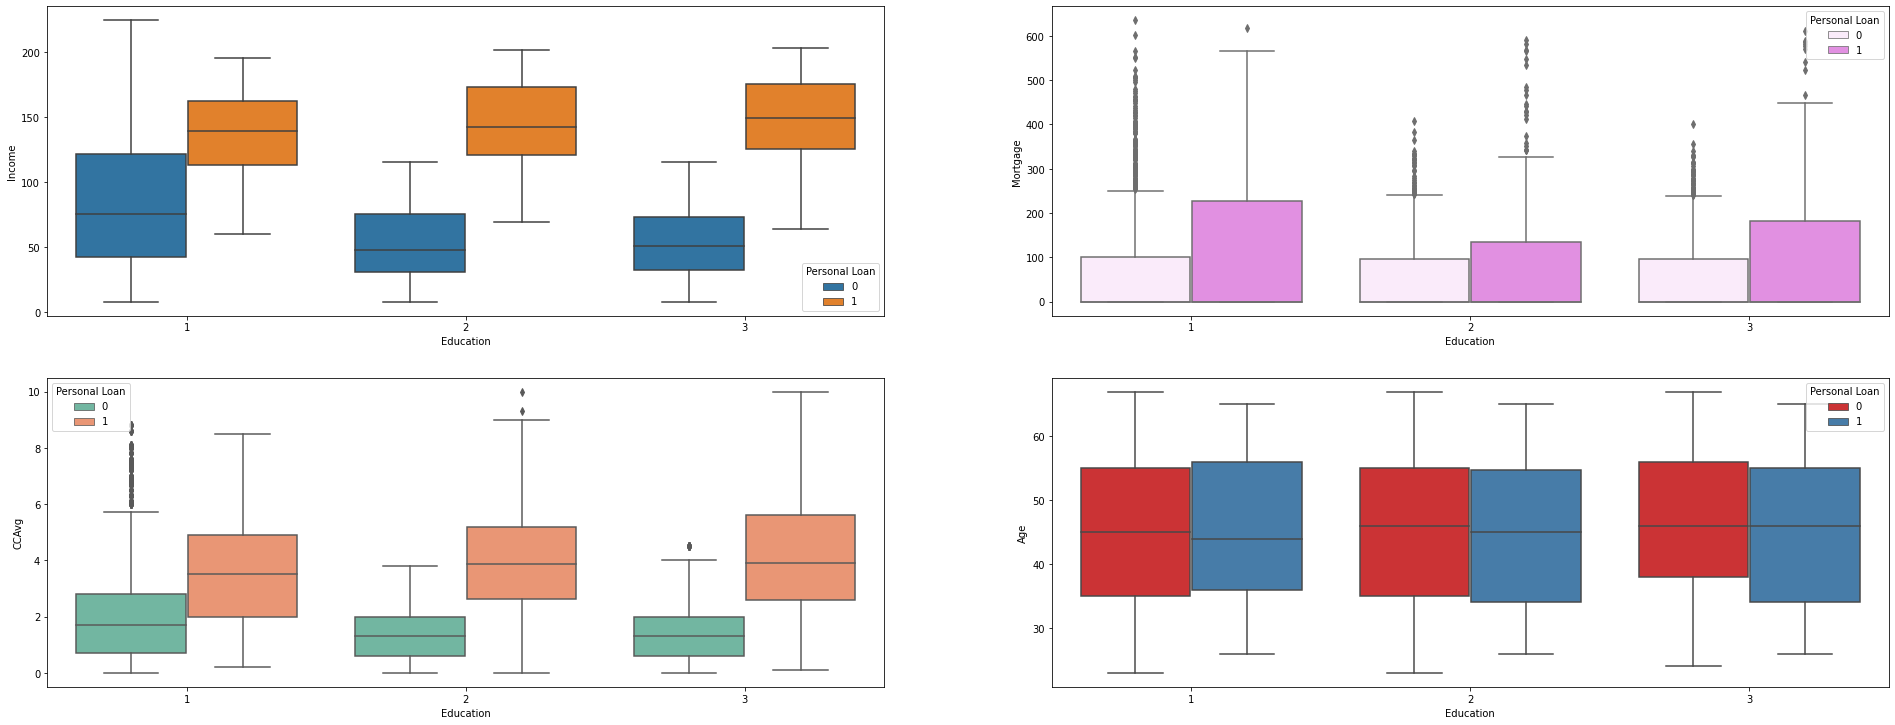

In [34]:
#boxplot for analysing data 
plt.figure(figsize=(33,33))
plt.subplot(5,2,1)
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)
plt.subplot(5,2,2)
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='violet')
plt.subplot(5,2,3)
sns.boxplot(x="Education", y='CCAvg', hue="Personal Loan", data=data,palette='Set2')
plt.subplot(5,2,4)
sns.boxplot(x="Education", y='Age', hue="Personal Loan", data=data,palette='Set1')


**Observation**

1.    It seems the customers whose education level is 1 is having more income.   However customers who has taken the personal loan have the same income levels i.e., high.
2. From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage


3.   From the above graph we can infer that People having Loan is having more CCAvg
4.  We can say that Age and Education are symmetrical divided with respect to Loan




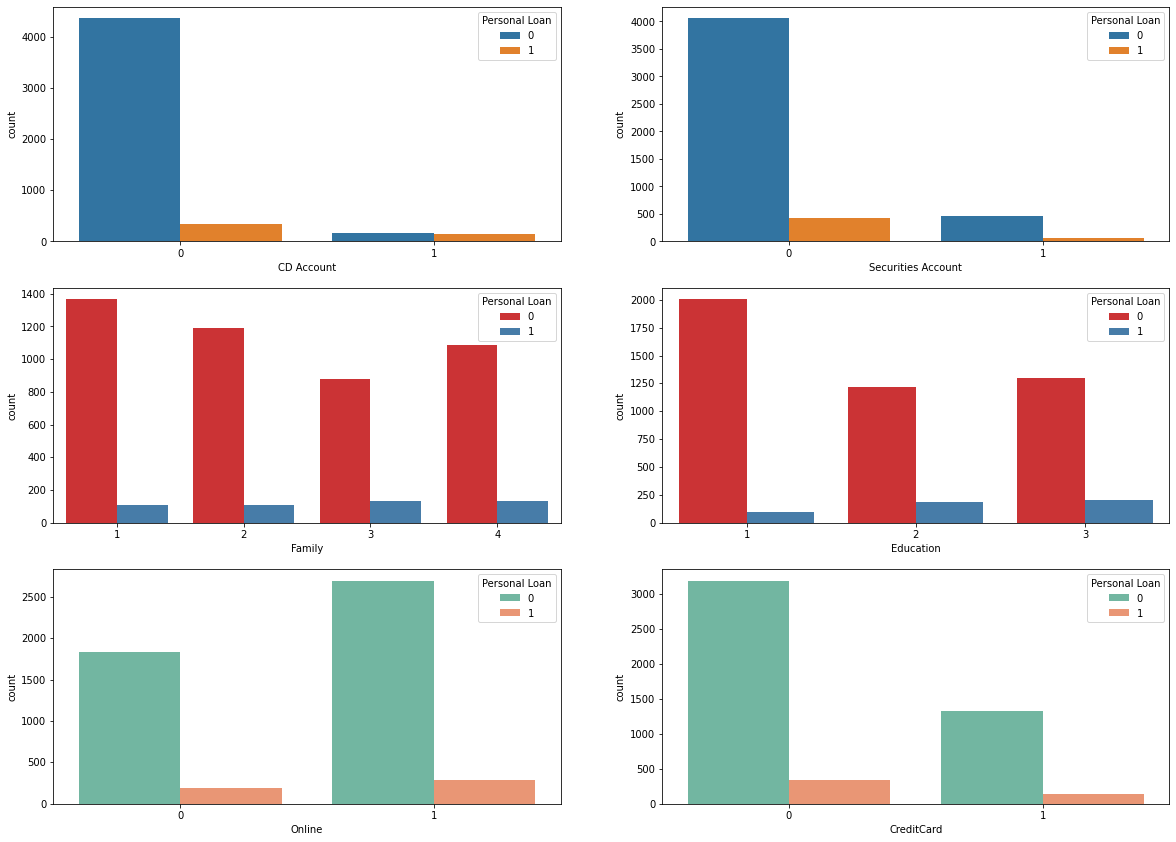

In [35]:
#countplot for analysing data 
plt.figure(figsize= (20,25))
plt.subplot(5,2,1)
sns.countplot(x='CD Account',data=data,hue='Personal Loan')
plt.subplot(5,2,2)
sns.countplot(x='Securities Account',data=data,hue='Personal Loan')
plt.subplot(5,2,3)
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')
plt.subplot(5,2,4)
sns.countplot(x='Education',data=data,hue='Personal Loan',palette='Set1')
plt.subplot(5,2,5)
sns.countplot(x='Online',data=data,hue='Personal Loan',palette='Set2')
plt.subplot(5,2,6)
sns.countplot(x='CreditCard',data=data,hue='Personal Loan',palette='Set2')

**Observation**


1. Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well
2.   Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account
3.  Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.
4.From the above graph it is clear that People with higher Qualification are intrested in Personal loan
5.By this graph we can assume that most online users are not having a Personal Loan
6.We can infer that people are having a loan if they haven't a Credit Card






Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0
Income of Non-Loan customers:  59000.0
Income of Loan customers    :  142500.0


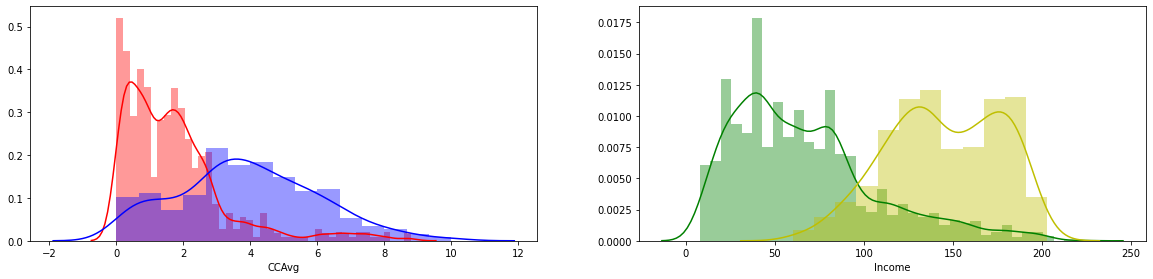

In [36]:
#distplot for analysing data 
plt.figure(figsize= (20,25))
plt.subplot(5,2,1)
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'b')
print('Credit card spending of Non-Loan customers: ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)
plt.subplot(5,2,2)
sns.distplot(data[data["Personal Loan"] == 0]['Income'], color = 'g')
sns.distplot(data[data["Personal Loan"] == 1]['Income'], color = 'y')
print('Income of Non-Loan customers: ',data[data['Personal Loan'] == 0]['Income'].median()*1000)
print('Income of Loan customers    : ', data[data['Personal Loan'] == 1]['Income'].median()*1000)


**Observation**


1.   The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.
2.   The second infers that income of people who have taken loan is higher compared to that of people who haven't taken loan



**Checking for correlation**

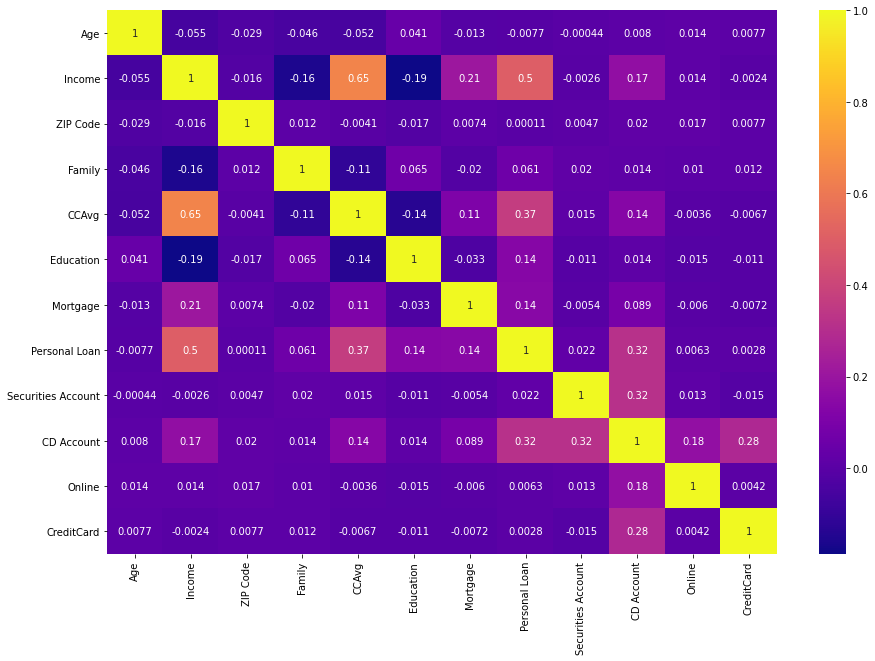

In [37]:
#Correlation matrix
ig,ax= plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

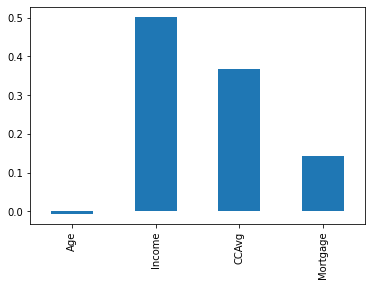

In [38]:
#correlation with Personal Loan
data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

**Observation**


*   The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.


# Normalisation and Splitting of data

In [39]:
#data spliting into X and Y for classification
data_X = data.loc[:,data.columns != 'Personal Loan']
data_Y = data[['Personal Loan']]

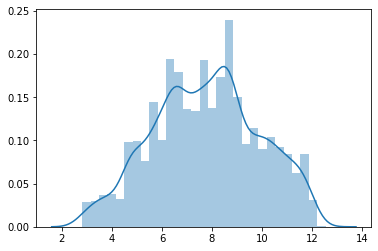

In [40]:
from sklearn.preprocessing import PowerTransformer
#Transforming values using box-cox
powTra = PowerTransformer(method='box-cox',standardize=False)
powTra.fit(data_X['Income'].values.reshape(-1,1))
tmp = powTra.transform(data_X['Income'].values.reshape(-1,1))
sns.distplot(tmp)

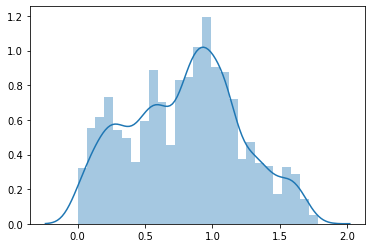

In [41]:
#Transforming values using yeo-johnson
powTra = PowerTransformer(method='yeo-johnson',standardize=False)
powTra.fit(data_X['CCAvg'].values.reshape(-1,1))
tmp = powTra.transform(data_X['CCAvg'].values.reshape(-1,1))
sns.distplot(tmp)

In [42]:
#Applying Encoding to mortgage
data_X['Mortgage_Int'] = pd.cut(data_X['Mortgage'],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest = True)
data_X.drop('Mortgage',axis=1,inplace=True)


In [43]:
#dataset for classification
data_X

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,1,0,0
4996,30,15,92037,4,0.4,1,0,0,1,0,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,1,0,0


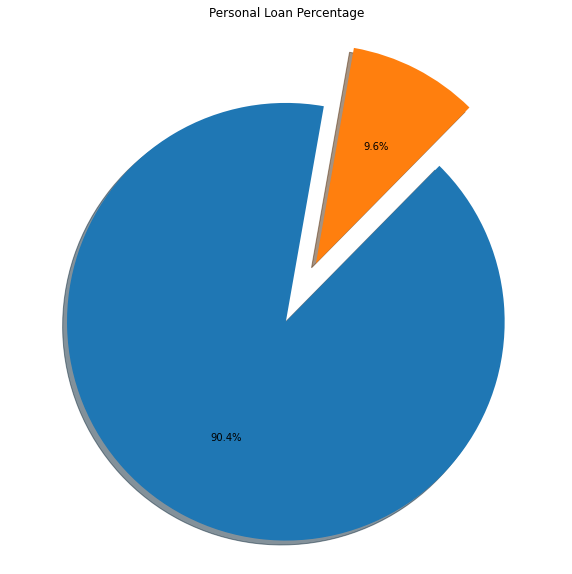

In [44]:
#9.6 % people have taken Personal Loan
tmpDf  = pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
tmpDf.columns = ['Labels','Personal Loan']
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0,0.30)
ax1.pie(tmpDf['Personal Loan'],explode=explode, autopct='%1.1f%%',
        shadow=True,startangle=80)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

In [45]:
#Splitting data in train and test
train_X,test_X,train_Y,test_Y = train_test_split(data_X,data_Y,test_size=0.30,stratify=data_Y,random_state=0)

# Classification Algorithms

## Logistic Regression

In [46]:
#Applying Logistic regression Model
logreg = LogisticRegression()
logreg.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#Predicting the Test dataset
ypred = logreg.predict(test_X)
predictProb = logreg.predict_proba(test_X)

In [48]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(train_X, train_Y)))

Accuracy of logistic regression classifier on train set: 0.91


In [49]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_Y)))

Accuracy of logistic regression classifier on test set: 0.91


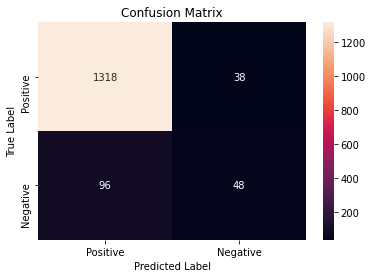

In [50]:
# Confusion Matrix
cm = metrics.confusion_matrix(test_Y, ypred)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
# The accuracy score of .91 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(test_Y, ypred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.56      0.33      0.42       144

    accuracy                           0.91      1500
   macro avg       0.75      0.65      0.68      1500
weighted avg       0.90      0.91      0.90      1500



**Observation**
* The precision and recall for class 1 is low

## K-NN

In [52]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# Empty list that will hold accuracy scores
ac_scores = []

* Finding value of neighbours for good accracy

In [53]:
# Perform accuracy metrics for values from 1,3,5....19
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y)
    
    # Predict the response
    ypred = knn.predict(test_X)
    
    # Evaluate accuracy
    scores = accuracy_score(test_Y, ypred)
    ac_scores.append(scores)
ac_scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

[0.888,
 0.8973333333333333,
 0.8946666666666667,
 0.9,
 0.9013333333333333,
 0.902,
 0.8993333333333333,
 0.9033333333333333,
 0.904,
 0.9033333333333333]

In [54]:
# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 17


* The optimal number of neighbors is 17

In [55]:
##knn model classification for n=17 using weighted uniform
knn = KNeighborsClassifier(n_neighbors= 17, weights = 'uniform', metric = 'euclidean')
knn.fit(train_X, train_Y)    
predicted = knn.predict(test_X)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_Y, predicted)

print('Accuracy of K-NN classifier on test set for weight is uniform: {:.2f}'.format(acc))

Accuracy of K-NN classifier on test set for weight is uniform: 0.90


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [56]:
#knn model classification for n=17 using weighted disance
knn = KNeighborsClassifier(n_neighbors= 17, weights = 'distance', metric = 'euclidean')
knn.fit(train_X, train_Y)    
predicted = knn.predict(test_X)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_Y, predicted)
print('Accuracy of K-NN classifier on test set for weight is distance: {:.2f}'.format(acc))

Accuracy of K-NN classifier on test set for weight is distance: 0.91


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


* Misclassification Error vs K

Text(0, 0.5, 'Misclassification Error')

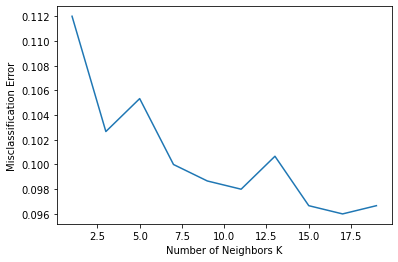

In [57]:
#finding mean error for different niebhours
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

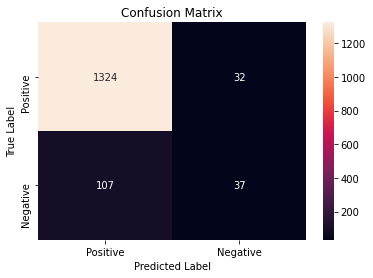

In [58]:
# Confusion Matrix
cm1 = confusion_matrix(test_Y, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [59]:
# Classification Report
print(classification_report(test_Y, predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1356
           1       0.54      0.26      0.35       144

    accuracy                           0.91      1500
   macro avg       0.73      0.62      0.65      1500
weighted avg       0.89      0.91      0.89      1500



**Observation**
* Though overall accuracy is good,It is very low for class 1.That is because majority of data points belong to class 0 and in KNN, probability of finding data points from class 0 closer to a test point than a data point from class 1 is high.

## Naive Bayes

In [60]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [61]:
# Model
naive_model = GaussianNB()
naive_model.fit(train_X, train_Y)

prediction = naive_model.predict(test_X)
naive_model.score(test_X,test_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8933333333333333

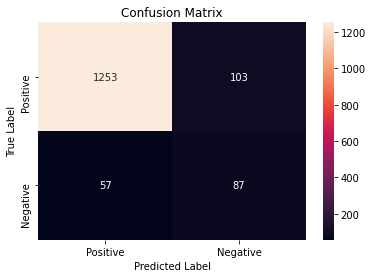

In [62]:
# Confusion Matrix
cm2 = confusion_matrix(test_Y, prediction)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(test_Y, prediction))

Accuracy on test set: 0.8933333333333333


In [64]:
# Classififcation Report
print(classification_report(test_Y, prediction))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.46      0.60      0.52       144

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500



**Observation**
* Till Now we can say that class 1 Accuracy is high for Naive Bayes,Though the overall accuracy is decreased.


## Decision tree classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
#assigning classifier
dt_model=DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
#Predicting test set
y_predict = dt_model.predict(test_X)

In [67]:
print('Accuracy is :',dt_model.score(test_X , test_Y))

Accuracy is : 0.978


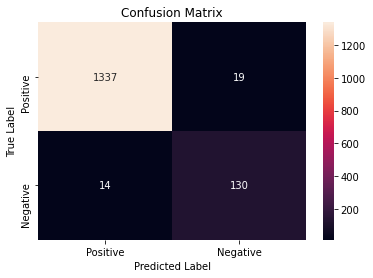

In [68]:
# Confusion Matrix
cm2 = confusion_matrix(test_Y, y_predict)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [69]:
 # do not rely on the accuracy score when data is skewed
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_X.columns))

                         Imp
Age                 0.017652
Income              0.542332
ZIP Code            0.019043
Family              0.125126
CCAvg               0.107229
Education           0.168337
Securities Account  0.003004
CD Account          0.006246
Online              0.003451
CreditCard          0.001240
Mortgage_Int        0.006339


In [70]:
# Classififcation Report
print(classification_report(test_Y, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.87      0.90      0.89       144

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**Observation**
* Accuracy of model is greater compared to other models till now.And even accuracy of either classes are comparable.
* Given the decision tree gives best result, let us try ensemble of trees 

## Random Forest classifier and Other Ensemble Classifiers

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
#assigning model classifier
rfcl = RandomForestClassifier(random_state=0)
rfcl.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
#Predicting test set
predicted_random=rfcl.predict(test_X)
rfcl.score(test_X,test_Y)

0.9886666666666667

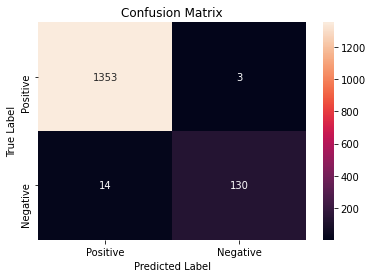

In [73]:
# Confusion Matrix
cm2 = confusion_matrix(test_Y, predicted_random)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [74]:
# Classififcation Report
print(classification_report(test_Y, predicted_random))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [75]:
#assigning Classifier
bgcl = BaggingClassifier()
bgcl.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [76]:
#oredicting test set
predicted_random=bgcl.predict(test_X)
bgcl.score(test_X,test_Y)

0.9853333333333333

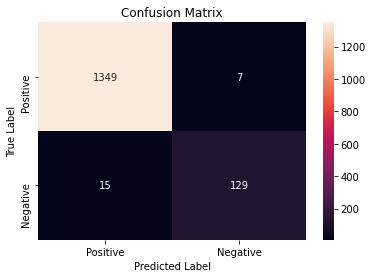

In [77]:
# Confusion Matrix
cm2 = confusion_matrix(test_Y, predicted_random)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:
# Classififcation Report
print(classification_report(test_Y, predicted_random))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.95      0.90      0.92       144

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [79]:
#Assiginng classifier
enclf = VotingClassifier(estimators = [('rf', rfcl), ('bg', bgcl)], voting = 'hard')
enclf.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [80]:
#predicting test set
predicted_random=enclf.predict(test_X)
enclf.score(test_X,test_Y)

0.9866666666666667

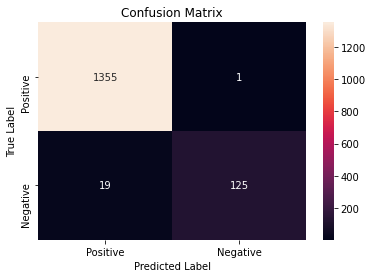

In [81]:
# Confusion Matrix
cm2 = confusion_matrix(test_Y, predicted_random)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
# Classififcation Report
print(classification_report(test_Y, predicted_random))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      0.87      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.93      0.96      1500
weighted avg       0.99      0.99      0.99      1500



**Observation**


*   In the ensemble technique, all are performing well in the class 1 category as they are are based on Decision Tree
*   And by above results for accuracy we can say that almost every model is same.So that is when we need to consider the classification report for the model.



# Best Model for Prediction (Overview)

In [83]:
models=[]
# evaluate each model in turn

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GaNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('BaC', BaggingClassifier()))
models.append(('VoC', VotingClassifier(estimators = [('rf', rfcl), ('bg', bgcl)], voting = 'hard')))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LR: 0.908600 (0.018429)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

KNN: 0.906800 (0.016975)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

GaNB: 0.884800 (0.023549)
DTC: 0.982400 (0.006974)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array

RF: 0.986200 (0.007846)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

BaC: 0.984600 (0.008126)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

VoC: 0.985400 (0.007513)


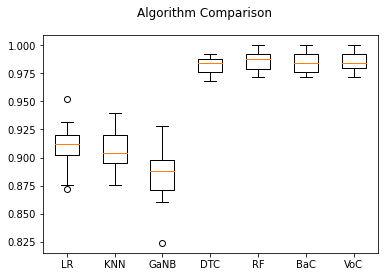

In [84]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=20, random_state=12345)
    cv_results = model_selection.cross_val_score(model, data_X, data_Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation**


*   The accuracy metric which is the overall model's peformance i.e. not class specific, can be misleading
*   So,when the target classes are extremely skewed (i.e. do not have same no of samples). We should always use the recall and precision metric.
* Recall is, how many records of a class were correctly identified as belonging to that class.i.e. True Positive / (True Positive + False Negative)
*   Precision is how many records identified as belonging to class 1 truly belong to class 1 i.e. 
True Positive / (True Positive + False Positive)
*  So we should make sure that our model peforms well on these metrics for all the classes, especially for the classes which have lower representation in the skew





**Best Model- Conclusion**



*  Seven classification algorithms were used in this study. 

1.   The logistic Regression model has the accuracy 0.91 which is low compared to others.
2.   The KNN is distance based which not perfect for this situation.Though the accuracy is ok(0.91) but confusion matrix tells that is correct predictions is not that much acceptable
3.  The Naive Bayes giving the accuracy less in comaprision to other models meaning the probability of determing the target correctly is less.
4.   It seems like Decision Tree algorithm have the high accuracy(0.98) and we can choose this as our final model,but it doesn't have good precision and recall values for class 1.
5. It has a high accuracy(0.99) compared to all the other models but it has slightly high recall value for class 1 compared to others,which is not so good to confirm the model as Random Forest.
6. Though Bagging Classifier gives high accuracy(0.98) and comparatively less recall value than Random Forest.It has comparatively less precision than others which doesn't make to selct it.
7. And the final classifier used is **Voting Classifier** which is a collection of several models working together on a single set is called an ensemble. The method is called Ensemble Learning. It is much more useful, uses all different models rather than any one. 
*  Lower error
* Less over-fitting
* Taste great
* Has good accuracy of 0.985 and high precision and low recall values for class 1 so,can select as the final model for the classification and prediction for the bank in campaigning for Personal Loans 






# Business Understanding(Conclusion)

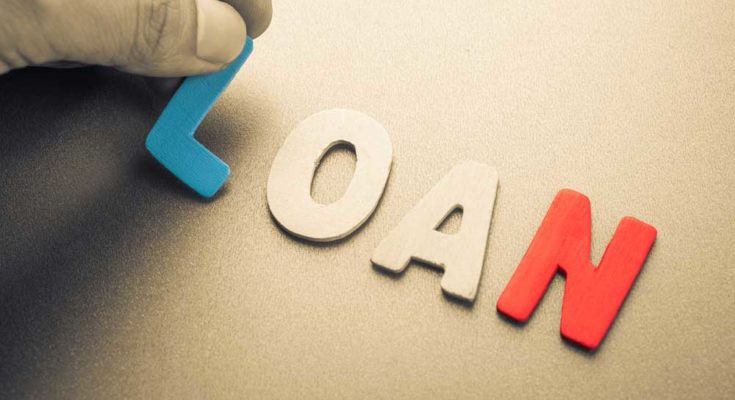



*   The aim of the bank is to convert there liability customers into loan customers
*   They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.

* The Voting Classifier model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.






**Business Understanding**

1. Customers of age between 25 and 65 can take Personal Loan.
2. Customers living in the region of Zip Code 94000-95000 are most intrested in taking Loan.
3. People having income in range of 100k-200k are opting for Personal Loan
4. Comparatively People having more Family members are looking towards Loan than Family with less members.
5. People having CCAvg(Average credit card spending) more than 2k are intrested in Personal Loan
6. People having more Education Qualification are slightly intrested to take Loan.
7. Customers using online banking are slightly ready to take up Loan.
